In [41]:
#Short code to figure out the best number of clusters for a distribution of images in a directory.
#Also has code to convert images in to vector + how to do it for multiple images in a directory
#Assuming all images are processed and are of same dimensions

import sklearn
from sklearn.cluster import KMeans
import numpy as np

In [42]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans

img = Image.open('bird_small.png').convert('RGBA')
arr = np.array(img)

# record the original shape
shape = arr.shape

# make a 1-dimensional view of arr
flat_arr = arr.ravel()

# convert it to a matrix
vector = np.matrix(flat_arr)

#Just as an example
X = np.concatenate([vector,1*vector,1.5*vector,100.5*vector,200*vector])

In [43]:
#Use this if you have a directory of images

#from skimage.io import imread_collection

#your path 
#col_dir = 'Training/*.jpg'
#col = imread_collection(col_dir)
#X = [arr.ravel() for arr in x_train]



In [44]:
def kmeanscost(K):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    c=0
    m=X.shape[0]
    for i in range(0,m):
        c = c+(X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]])*((X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]]).T)
    cost = (1/float(m))*c 
    return float(cost)



In [45]:
import matplotlib.pyplot as plt

In [46]:
max_clusters=4
costs = []
for i in range(1,max_clusters+1):
    costs.append(kmeanscost(i))

In [47]:
costs

[12587886005467.764, 1970624458634.4336, 66347082.53333334, 0.0]

In [48]:
cluster_nums = range(1,max_clusters+1)

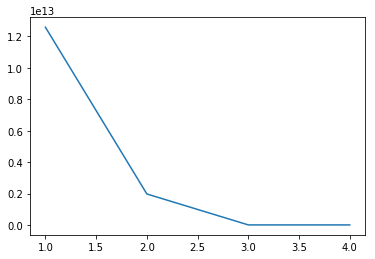

In [49]:
plt.plot(cluster_nums,costs)